In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def eval_fun(x):
    return x**2 - math.sin(x)
    # return x * (x - 9.52)

Initial reduced: a'=0, b'=0.6180760000000001
Iteration 1:
   a'=0.000000000000, b'=0.618076000000
   x_i=0.236029032000, f(x_i)=-0.178133906487
   x_i1=0.382046968000, f(x_i1)=-0.226860752027
Iteration 2:
   a'=0.236029032000, b'=0.618076000000
   x_i=0.381894973776, f(x_i)=-0.226835826522
   x_i1=0.472210058224, f(x_i1)=-0.231873256486
Iteration 3:
   a'=0.381894973776, b'=0.618076000000
   x_i=0.472040125794, f(x_i)=-0.231882372738
   x_i1=0.527930847982, f(x_i1)=-0.225036001044

Total iterations: 4
Final interval of uncertainty is [0.381894973776 , 0.5279308479824321]
Final optimum lies at x = 0.454913 (midpoint)


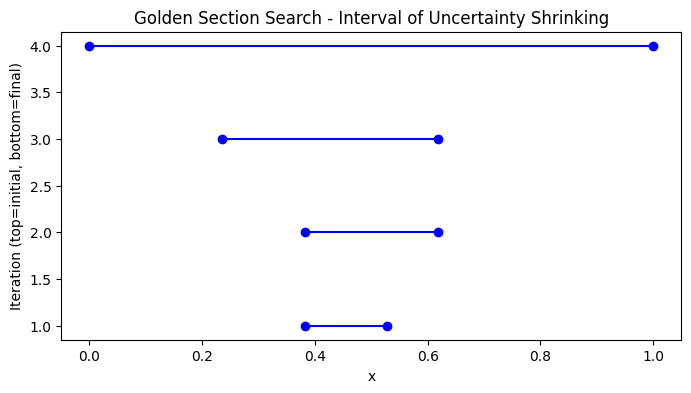

(0.381894973776, 0.5279308479824321, 0.45491291087921604)

In [3]:
gamma = 0.618

def golden_section_method(a, b, eval_fun, epsilon=0.05):
    L0 = abs(b - a)
    l2_star = (gamma**2) * L0
    x0 = a + l2_star
    x1 = b - l2_star
    f_x0 = eval_fun(x0)
    f_x1 = eval_fun(x1)

    a_dash, b_dash = a, b   
    intervals = [(a, b)]
    if f_x0 > f_x1:
        a_dash = x0
        b_dash = b
    elif f_x0 < f_x1:
        a_dash = a
        b_dash = x1
    print(f"Initial reduced: a'={a_dash}, b'={b_dash}")
    i = 3
    iteration_count = 1
    while abs(b_dash - a_dash) >= epsilon:
        li_star = (gamma**i) * L0
        x_i = a_dash + li_star
        x_i1 = b_dash - li_star
        f_x_i = eval_fun(x_i)
        f_x_i1 = eval_fun(x_i1)

        print(f"Iteration {iteration_count}:")
        print(f"   a'={a_dash:.12f}, b'={b_dash:.12f}")
        print(f"   x_i={x_i:.12f}, f(x_i)={f_x_i:.12f}")
        print(f"   x_i1={x_i1:.12f}, f(x_i1)={f_x_i1:.12f}")
        if f_x_i > f_x_i1:
            a_dash = x_i
        elif f_x_i < f_x_i1:
            b_dash = x_i1
        intervals.append((a_dash, b_dash))

        iteration_count += 1
        i += 1
    print(f"\nTotal iterations: {iteration_count}")
    print(f"Final interval of uncertainty is [{a_dash} , {b_dash}]")
    print(f"Final optimum lies at x = {(a_dash+b_dash)/2:.6f} (midpoint)")
    plt.figure(figsize=(8, 4))
    for k, (left, right) in enumerate(intervals):
        plt.plot([left, right], [len(intervals)-k]*2, "bo-")
    plt.title("Golden Section Search - Interval of Uncertainty Shrinking")
    plt.xlabel("x")
    plt.ylabel("Iteration (top=initial, bottom=final)")
    plt.show()
    return a_dash, b_dash, (a_dash + b_dash) / 2
golden_section_method(0, 1, eval_fun, 0.2)